# Loan default prediction model_P1_EDA & data cleaning

In [208]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

In [209]:
#ls

Importing raw data

In [210]:
loan = pd.read_csv('lending_club_loan_two.csv')

In [211]:
loan.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"


In [212]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

Checking for null values

In [213]:
loan.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [214]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

Checking the target variable count - Imbalanced

<AxesSubplot:xlabel='loan_status', ylabel='count'>

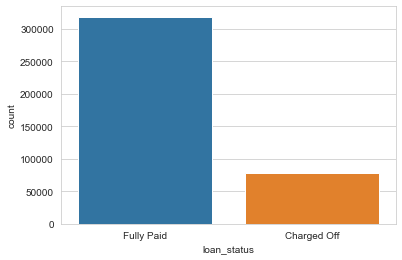

In [215]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status', data=loan)   

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

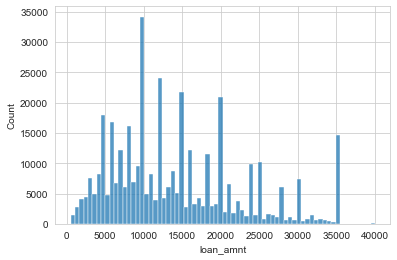

In [216]:
sns.histplot(loan['loan_amnt'], bins=70)

Finding correlation of target with predictors

<AxesSubplot:>

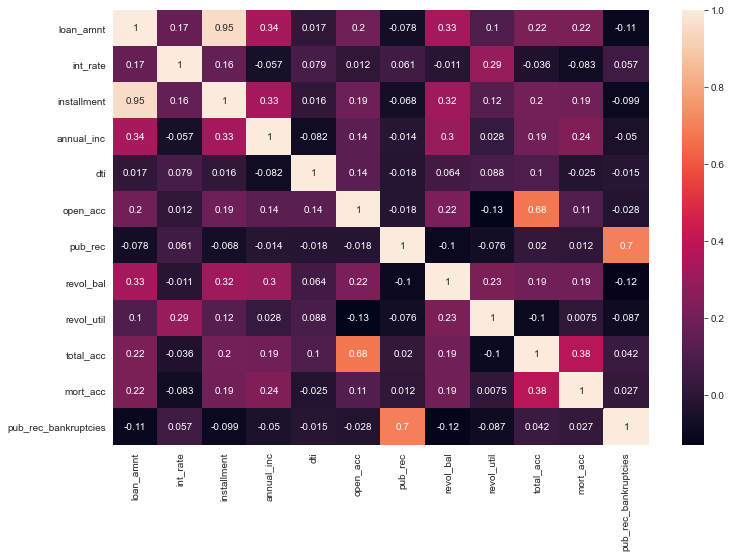

In [217]:
plt.figure(figsize=(12,8))
sns.heatmap(loan.corr(), annot=True)

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

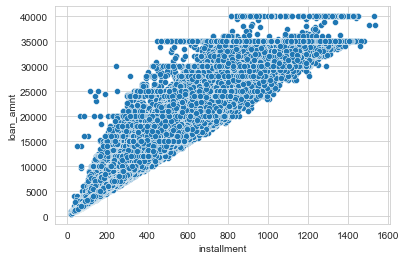

In [218]:
sns.scatterplot(x='installment',y='loan_amnt',data=loan)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

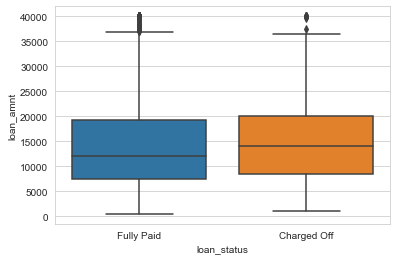

In [219]:
sns.boxplot(x='loan_status',y='loan_amnt',data=loan)

The charged-off principle average seems to be higher than fully-paid

In [220]:
loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [221]:
loan['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [222]:
np.sort(loan['sub_grade'].unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

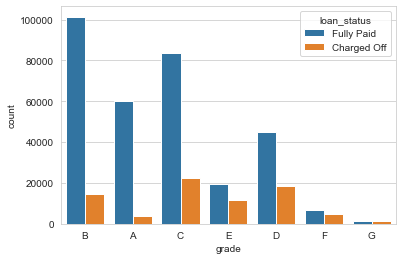

In [223]:
sns.countplot(x='grade',data=loan,hue='loan_status')

The F & G grade seems to have too higher default rate

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

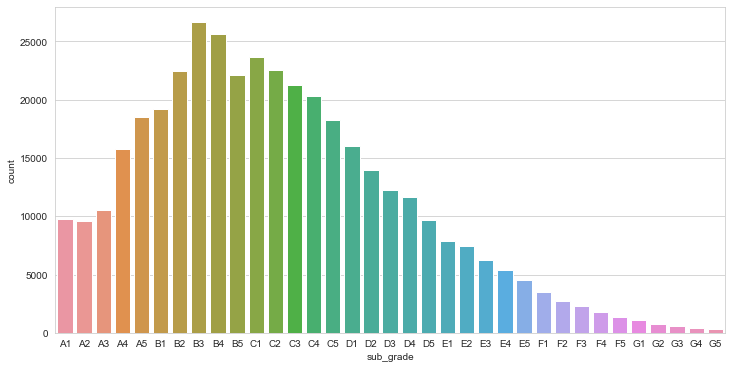

In [224]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=loan, order=np.sort(loan['sub_grade'].unique()))

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

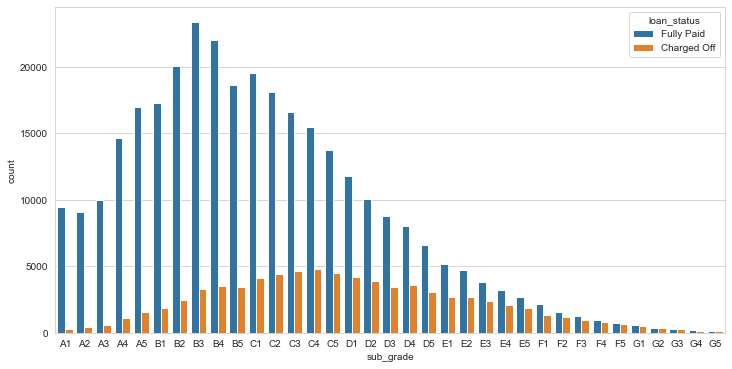

In [225]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=loan, order=np.sort(loan['sub_grade'].unique()), hue='loan_status')

Deep dive into the groups having high percentage of defaulters

In [226]:
f_and_g = loan[(loan['grade']=='F') | (loan['grade']=='G')]
f_and_g.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
66,15975.0,60 months,24.99,468.80,F,F4,carrier,5 years,MORTGAGE,47000.0,...,10.0,0.0,2049.0,58.5,23.0,w,INDIVIDUAL,1.0,0.0,"59681 Christopher Lock\nNorth Williamtown, UT ..."
87,30000.0,60 months,24.70,875.28,G,G1,Medtronic,5 years,MORTGAGE,187321.0,...,21.0,0.0,54810.0,93.4,52.0,f,INDIVIDUAL,3.0,0.0,"25281 Kevin Neck\nArmstrongton, TN 29597"
96,12625.0,60 months,25.78,376.36,F,F5,Nursing Assistant,7 years,MORTGAGE,43000.0,...,18.0,0.0,19993.0,55.7,31.0,w,INDIVIDUAL,1.0,0.0,"522 Melissa Village\nEast Janice, MT 00813"


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

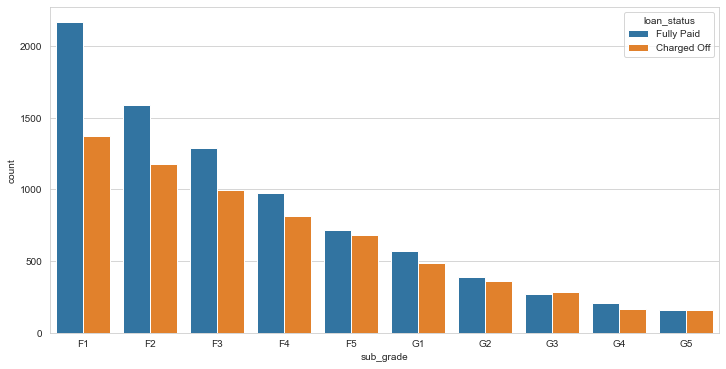

In [227]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=f_and_g, order= np.sort(f_and_g['sub_grade'].unique()),hue='loan_status')

Mapping the target variable class to numbers for easy handling

In [228]:
loan['loan_repaid'] = loan['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [229]:
loan[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


Finding the correlation between the target and the numerical feature variables

<AxesSubplot:>

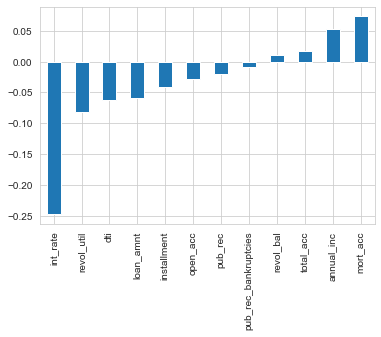

In [230]:
loan.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar') 

In [231]:
len(loan)

396030

Fnding what percentage of data are missing in each feature

In [232]:
(loan.isnull().sum()/len(loan))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [233]:
loan['emp_title'].nunique()

173105

In [234]:
loan['emp_title'].value_counts()

Teacher                   4389
Manager                   4250
Registered Nurse          1856
RN                        1846
Supervisor                1830
                          ... 
DEALER SERVICES              1
TRANSPORT DRIVER             1
Nutrimedia, LLC              1
Heartland express inc.       1
it security analyst          1
Name: emp_title, Length: 173105, dtype: int64

Dropping emp_title as there are too many unique titles

In [235]:
loan.drop(columns=['emp_title'],axis=1, inplace=True)

In [236]:
loan['emp_length'].nunique()

11

<AxesSubplot:xlabel='emp_length', ylabel='count'>

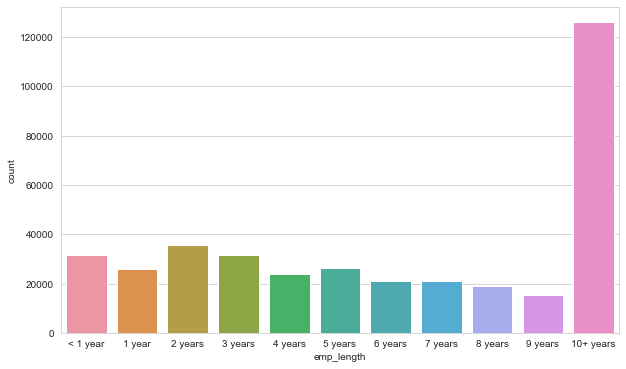

In [237]:
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length',data=loan, order=['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'])

In [238]:
sorted(loan['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

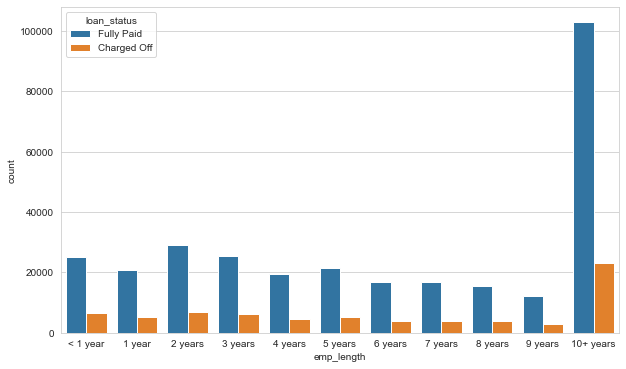

In [239]:
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length',data=loan, order=['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'], hue='loan_status')

In [240]:
emp_count = loan.groupby('emp_length')['loan_status'].count()

In [241]:
emp_co = loan[loan['loan_status']=='Charged Off'].groupby('emp_length')['loan_status'].count()

In [242]:
emp_fp = loan[loan['loan_status']=='Fully Paid'].groupby('emp_length')['loan_status'].count()

In [243]:
(emp_co/emp_fp)

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

For different years of work experience, the percentage of defaulters is nearly the same. There is no variability. Hence dropping this feature

<AxesSubplot:xlabel='emp_length'>

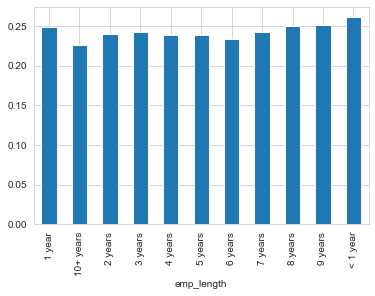

In [244]:
(emp_co/emp_fp).plot(kind='bar')

In [245]:
loan.drop(columns=['emp_length'],axis=1, inplace=True)

In [246]:
loan.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [247]:
loan['title'].nunique()

48817

In [248]:
loan['title'].value_counts()

Debt consolidation                     152472
Credit card refinancing                 51487
Home improvement                        15264
Other                                   12930
Debt Consolidation                      11608
                                        ...  
Refinance high interest Credit Card         1
Apartment Funding                           1
Fix everything loan                         1
leneding club credit card refi              1
loanish                                     1
Name: title, Length: 48817, dtype: int64

In [249]:
loan['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [250]:
loan['purpose'].nunique()

14

The loan title seems to be included in 'purpose' feature, hence dropping that

In [251]:
loan.drop(columns=['title'],axis=1, inplace=True)

In [252]:
loan['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

In [253]:
loan.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Mort_acc has good correlation with total_acc

In [254]:
loan['total_acc'].nunique()

118

In [255]:
loan['total_acc'].unique()

array([ 25.,  27.,  26.,  13.,  43.,  23.,  15.,  40.,  37.,  61.,  35.,
        22.,  20.,  36.,  38.,   7.,  18.,  10.,  17.,  29.,  16.,  21.,
        34.,   9.,  14.,  59.,  41.,  19.,  12.,  30.,  56.,  24.,  28.,
         8.,  52.,  31.,  44.,  39.,  50.,  11.,  62.,  32.,   5.,  33.,
        46.,  42.,   6.,  49.,  45.,  57.,  48.,  67.,  47.,  51.,  58.,
         3.,  55.,  63.,  53.,   4.,  71.,  69.,  54.,  64.,  81.,  72.,
        60.,  68.,  65.,  73.,  78.,  84.,   2.,  76.,  75.,  79.,  87.,
        77., 104.,  89.,  70., 105.,  97.,  66., 108.,  74.,  80.,  82.,
        91.,  93., 106.,  90.,  85.,  88.,  83., 111.,  86., 101., 135.,
        92.,  94.,  95.,  99., 102., 129., 110., 124., 151., 107., 118.,
       150., 115., 117.,  96.,  98., 100., 116., 103.])

<AxesSubplot:xlabel='mort_acc', ylabel='count'>

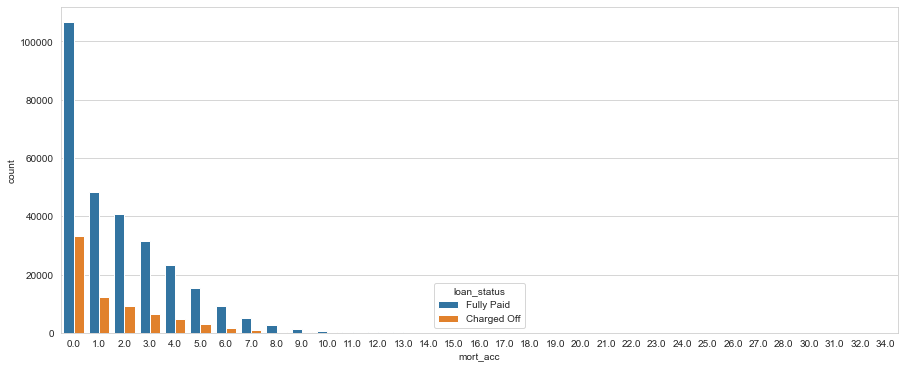

In [256]:
plt.figure(figsize=(15,6))
sns.countplot(x='mort_acc', data=loan,hue='loan_status')

In [257]:
mort_acc_co = loan[loan['loan_status']=='Charged Off'].groupby('mort_acc').count()['loan_amnt']
print(mort_acc_co)

mort_acc
0.0     33157
1.0     12122
2.0      9297
3.0      6535
4.0      4615
5.0      2858
6.0      1721
7.0       897
8.0       443
9.0       209
10.0      112
11.0       57
12.0       37
13.0       17
14.0        9
15.0       11
16.0       10
17.0        3
18.0        2
19.0        5
20.0        3
21.0        1
22.0        1
23.0        1
Name: loan_amnt, dtype: int64


In [258]:
mort_acc_fp = loan[loan['loan_status']=='Fully Paid'].groupby('mort_acc').count()['loan_amnt']
print(mort_acc_fp)

mort_acc
0.0     106620
1.0      48294
2.0      40651
3.0      31514
4.0      23272
5.0      15336
6.0       9348
7.0       5155
8.0       2678
9.0       1447
10.0       753
11.0       422
12.0       227
13.0       129
14.0        98
15.0        50
16.0        27
17.0        19
18.0        16
19.0        10
20.0        10
21.0         3
22.0         6
23.0         1
24.0        10
25.0         4
26.0         2
27.0         3
28.0         1
30.0         1
31.0         2
32.0         2
34.0         1
Name: loan_amnt, dtype: int64


In [259]:
mort_acc_co/mort_acc_fp

mort_acc
0.0     0.310983
1.0     0.251004
2.0     0.228703
3.0     0.207368
4.0     0.198307
5.0     0.186359
6.0     0.184104
7.0     0.174006
8.0     0.165422
9.0     0.144437
10.0    0.148738
11.0    0.135071
12.0    0.162996
13.0    0.131783
14.0    0.091837
15.0    0.220000
16.0    0.370370
17.0    0.157895
18.0    0.125000
19.0    0.500000
20.0    0.300000
21.0    0.333333
22.0    0.166667
23.0    1.000000
24.0         NaN
25.0         NaN
26.0         NaN
27.0         NaN
28.0         NaN
30.0         NaN
31.0         NaN
32.0         NaN
34.0         NaN
Name: loan_amnt, dtype: float64

Obtaining mean value of mort_acc corresponding to total_acc

In [260]:
mean_mortacc_based_totalacc = loan.groupby('total_acc').mean()['mort_acc']

In [261]:
mean_mortacc_based_totalacc[3.0]

0.05202312138728324

Data imputation: Custom function to fill missing values of mort_acc based on mort_acc value corresponding to total_acc value

In [262]:
def fill_mort_acc(mort_acc,total_acc):
    if np.isnan(mort_acc):
        return mean_mortacc_based_totalacc[total_acc]
    else:
        return mort_acc

In [263]:
loan['mort_acc'] = loan.apply(lambda x: fill_mort_acc(x['mort_acc'],x['total_acc']),axis=1)

In [264]:
loan.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

Ensured all mort_acc values are successfully imputed

In [265]:
loan['revol_util'].nunique()

1226

In [266]:
loan['pub_rec_bankruptcies'].nunique()

9

In [267]:
len(loan)

396030

Dropping any more records which are having null value as they are relatively low compared to the overall records

In [268]:
loan.dropna(axis=0, how='any',inplace=True)

In [269]:
len(loan)

395219

In [270]:
loan.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [271]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

Checking for features containing non-numerical values to convert them to numerical wherever possible

In [272]:
len(loan.select_dtypes(include=['object']).columns)

12

In [273]:
loan.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [274]:
loan['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [275]:
loan['term'] = loan['term'].map({' 36 months':36, ' 60 months':60})

In [276]:
loan['term'].unique()

array([36, 60], dtype=int64)

In [277]:
loan['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

In [278]:
loan['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [279]:
loan['issue_d'].unique()

array(['Jan-2015', 'Nov-2014', 'Apr-2013', 'Sep-2015', 'Sep-2012',
       'Oct-2014', 'Apr-2012', 'Jun-2013', 'May-2014', 'Dec-2015',
       'Apr-2015', 'Oct-2012', 'Jul-2014', 'Feb-2013', 'Oct-2015',
       'Jan-2014', 'Mar-2016', 'Apr-2014', 'Jun-2011', 'Apr-2010',
       'Jun-2014', 'Oct-2013', 'May-2013', 'Feb-2015', 'Oct-2011',
       'Jun-2015', 'Aug-2013', 'Feb-2014', 'Dec-2011', 'Mar-2013',
       'Jun-2016', 'Mar-2014', 'Nov-2013', 'Dec-2014', 'Apr-2016',
       'Sep-2013', 'May-2016', 'Jul-2015', 'Jul-2013', 'Aug-2014',
       'May-2008', 'Mar-2010', 'Dec-2013', 'Mar-2012', 'Mar-2015',
       'Sep-2011', 'Jul-2012', 'Dec-2012', 'Sep-2014', 'Nov-2012',
       'Nov-2015', 'Jan-2011', 'May-2012', 'Feb-2016', 'Jun-2012',
       'Aug-2012', 'Jan-2016', 'May-2015', 'Oct-2016', 'Aug-2015',
       'Jul-2016', 'May-2009', 'Aug-2016', 'Jan-2012', 'Jan-2013',
       'Nov-2010', 'Jul-2011', 'Mar-2011', 'Feb-2012', 'May-2011',
       'Aug-2010', 'Nov-2016', 'Jul-2010', 'Sep-2010', 'Dec-20

In [280]:
loan['purpose'].nunique()

14

In [281]:
loan['earliest_cr_line'].unique()

array(['Jun-1990', 'Jul-2004', 'Aug-2007', 'Sep-2006', 'Mar-1999',
       'Jan-2005', 'Aug-2005', 'Sep-1994', 'Jun-1994', 'Dec-1997',
       'Dec-1990', 'May-1984', 'Apr-1995', 'Jan-1997', 'May-2001',
       'Mar-1982', 'Sep-1996', 'Jan-1990', 'Mar-2000', 'Jan-2006',
       'Oct-2006', 'Jan-2003', 'May-2008', 'Oct-2003', 'Jun-2004',
       'Jan-1999', 'Apr-1994', 'Apr-1998', 'Jul-2007', 'Apr-2002',
       'Oct-2007', 'Jun-2009', 'May-1997', 'Jul-2006', 'Sep-2003',
       'Aug-1992', 'Dec-1988', 'Feb-2002', 'Jan-1992', 'Aug-2001',
       'Dec-2010', 'Oct-1999', 'Sep-2004', 'Aug-1994', 'Jul-2003',
       'Apr-2000', 'Dec-2004', 'Jun-1995', 'Dec-2003', 'Jul-1994',
       'Oct-1990', 'Dec-2001', 'Apr-1999', 'Feb-1995', 'May-2003',
       'Oct-2002', 'Mar-2004', 'Aug-2003', 'Oct-2000', 'Nov-2004',
       'Mar-2010', 'Mar-1996', 'May-1994', 'Jun-1996', 'Nov-1986',
       'Jan-2001', 'Jan-2002', 'Mar-2001', 'Sep-2012', 'Apr-2006',
       'May-1998', 'Dec-2002', 'Nov-2003', 'Oct-2005', 'May-19

In [282]:
loan['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [283]:
loan['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [284]:
loan.drop(columns=['grade'], axis=1, inplace=True)

In [285]:
pd.get_dummies(data=loan, columns=['sub_grade'], drop_first=True)

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0


In [286]:
fun = pd.DataFrame({'A':['a','b','c'],'B':['c','c','b'],'C':[1,2,3]})
fun

,A,B,C
0,a,c,1
1,b,c,2
2,c,b,3


In [287]:
pd.get_dummies(data=fun, columns=['A', 'B'], drop_first=True)

,C,A_b,A_c,B_c
0,1,0,0,1
1,2,1,0,1
2,3,0,1,0


Converting categorical features to dummy variables so as to fit ML models

In [288]:
loan = pd.get_dummies(data=loan, columns=['sub_grade','verification_status', 'application_type','initial_list_status','purpose'], drop_first=True)

In [289]:
loan.select_dtypes(include='object').columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [290]:
loan['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Merging the category 'None' and 'Any' with 'Other'

In [293]:
def home_own(home_owne):
    if home_owne not in ['NONE','ANY']:
        return home_owne
    elif home_owne == 'NONE':
        return 'OTHER'
    elif home_owne == 'ANY':
        return 'OTHER'

In [295]:
loan['home_ownership'] = loan['home_ownership'].apply(lambda x: home_own(x))

In [296]:
loan['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [301]:
loan = pd.get_dummies(data=loan,columns=['home_ownership'], drop_first=True)

In [307]:
loan['address'][0].split()[-1]

'22690'

Extracting zipcode alone from address to discard it

In [308]:
loan['zipcode'] = loan['address'].apply(lambda x: x.split()[-1])

In [310]:
loan['zipcode'].nunique()

10

In [312]:
loan = pd.get_dummies(data=loan,columns=['zipcode'], drop_first=True)

In [313]:
loan.drop(columns=['issue_d'], axis=1, inplace=True)

In [319]:
loan['earliest_cr_line'][0].split(sep='-')[-1]

'1990'

Extracting only the year to have it as a feature from 'earliest_cr_line'

In [320]:
loan['earliest_cr_year'] = loan['earliest_cr_line'].apply(lambda x: x.split(sep='-')[-1])

In [322]:
type(loan['earliest_cr_year'][0])

str

Converting the data type of 'earliest_cr_year'to numeric

In [323]:
loan['earliest_cr_year'] = loan['earliest_cr_year'].apply(pd.to_numeric)

In [324]:
type(loan['earliest_cr_year'][0])

numpy.int64

In [325]:
loan.drop(columns=['earliest_cr_line'], axis=1, inplace=True)

In [326]:
loan.head(3)

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,...,1,0,0,0,0,0,0,0,0,2007


In [327]:
loan.drop(columns=['loan_status'], axis=1, inplace=True)

In [331]:
loan.drop(columns=['address'], axis=1, inplace=True)

In [332]:
loan.head(3)

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,1,0,0,0,0,0,0,0,0,2007


Checking if all null values have been removed

In [333]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   open_acc                             395219 non-null  float64
 7   pub_rec                              395219 non-null  float64
 8   revol_bal                            395219 non-null  float64
 9   revol_util                           395219 non-null  float64
 10  total_acc                            395219 non-null  float64
 11  mort_acc     

Exporting the cleansed data as CSV for fitting ANN model using Google Colab 

In [334]:
loan.to_csv('Lending club_preprocessed.csv')

<AxesSubplot:xlabel='annual_inc', ylabel='loan_amnt'>

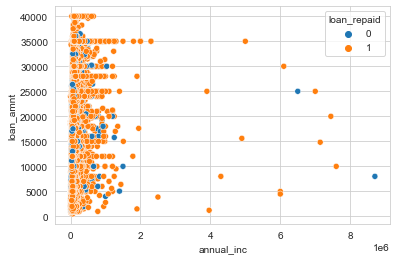

In [337]:
sns.scatterplot(x='annual_inc', y='loan_amnt',data=loan, hue='loan_repaid')